# Exercise 6 | Support Vector Machines

In [1]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score
import math
from scipy.special import expit, logit
import scipy.misc, scipy.io, scipy.optimize, scipy.cluster.vq
import imageio
from matplotlib.pyplot import figure

# Part 1: Loading and Visualizing Data

In [2]:
def ploteo(X,y):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    m,n = X.shape
    for i in range(m):
        x_, y_ = X[i][0], X[i][1]
        if y[i] == 1:
            c = 'tab:orange'
            marker = "*"
            #label = "y = 1"
        else:
            c = 'tab:blue'
            marker = '.'
            #label = "y = 0"
        plt.scatter(x_, y_, c=c, marker=marker)
    return plt.show()


Loading and Visualizing Data ...



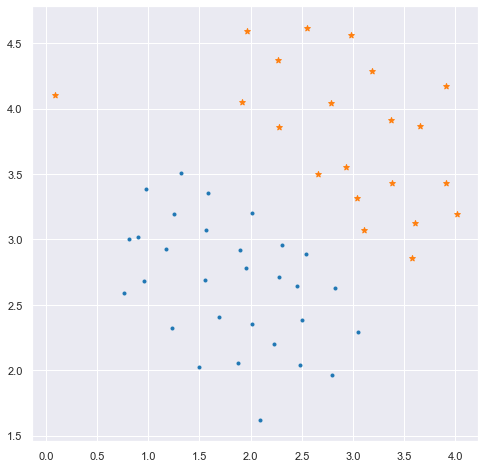

In [3]:
print('Loading and Visualizing Data ...\n')

# Load from ex6data1: 
# You will have X, y in your environment

mat = scipy.io.loadmat('ex6data1.mat')
# Plot training data
X = mat["X"]
y = mat["y"]
ploteo(X,y)
print()

# Part 2: Training Linear SVM 

In [5]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [39]:
from sklearn import svm
from sklearn.svm import SVC

# Load from ex6data1:

# You will have X, y in your environment
mat = scipy.io.loadmat('ex6data1.mat')
X = mat["X"]
y = mat["y"]

print('\nTraining Linear SVM ...\n')

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)




Training Linear SVM ...



In [40]:
model = SVC(C = 1, kernel='linear',tol = 1e-3 ,max_iter = 20)
model.fit(X, y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=20, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

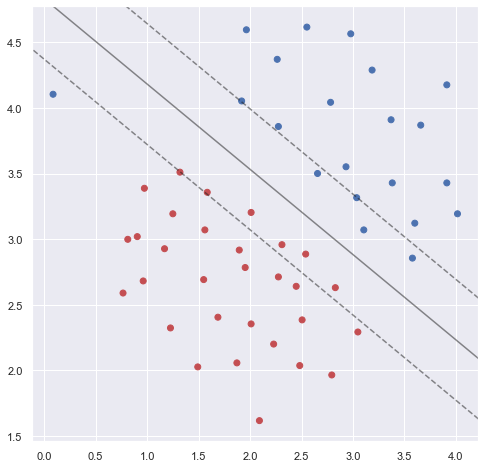

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1],color=["r" if c == 0 else "b" for c in y], cmap='autumn')
plot_svc_decision_function(model)



# Part 3: Implementing Gaussian Kernel

In [8]:
def gaussianKernel(x1, x2, sigma):
    sim = 0
    e = x1 - x2
    sim = np.exp(-(np.dot(e.T,e)) / (2*sigma*sigma))
    return sim

In [9]:
print('\nEvaluating the Gaussian Kernel ...\n')

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], \n sigma = {} :\t {}\n(for sigma = 2, this value should be about 0.324652)\n'.format(sigma, sim))


Evaluating the Gaussian Kernel ...

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], 
 sigma = 2 :	 0.32465246735834974
(for sigma = 2, this value should be about 0.324652)



# Part 4: Visualizing Dataset 2

Loading and Visualizing Data ...



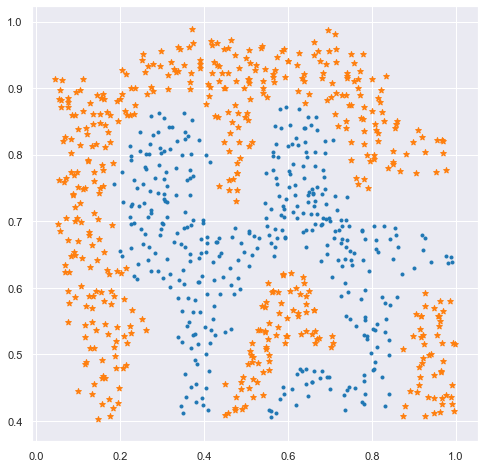

In [10]:
print('Loading and Visualizing Data ...\n')

# Load from ex6data2: 
# You will have X, y in your environment

mat = scipy.io.loadmat('ex6data2.mat')
X = mat["X"]
y = mat["y"]
# Plot training data
ploteo(X, y)

# Part 5: Training SVM with RBF Kernel (Dataset 2)

In [11]:
print('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n')

# Load from ex6data2:
# You will have X, y in your environment
mat = scipy.io.loadmat('ex6data2.mat')
XX = mat["X"]
yy = mat["y"]
# SVM Parameters
C = 1
sigma = 0.1
Sigma = gaussianKernel(x1, x2, sigma)
# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.
#model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma))
model1 = SVC(C = C, kernel="rbf")
model1.fit(XX, yy)




#visualizeBoundary(X, y, model);


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

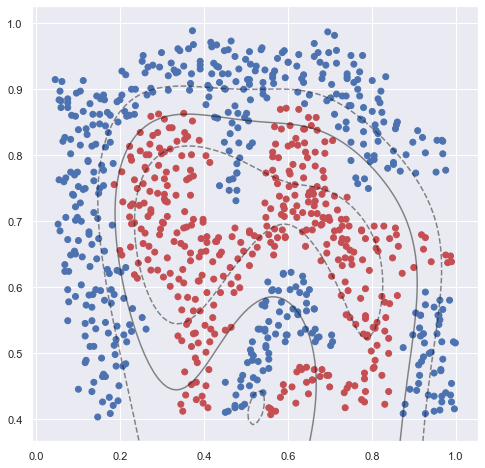

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(XX[:, 0], XX[:, 1], color=["r" if y == 0 else "b" for y in yy])
plot_svc_decision_function(model1)

# Part 6: Visualizing Dataset 3

Loading and Visualizing Data ...



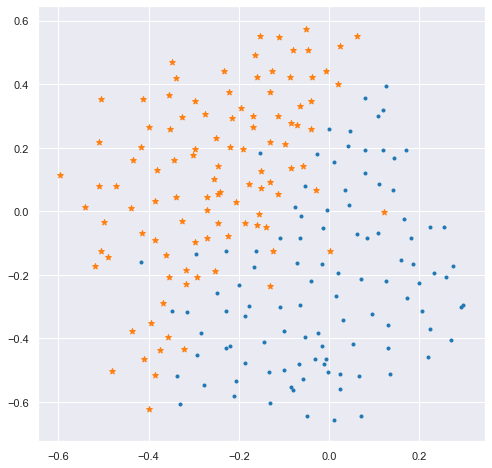

Program paused. Press enter to continue.



In [14]:
print('Loading and Visualizing Data ...\n')

# Load from ex6data3: 
# You will have X, y in your environment

mat = scipy.io.loadmat('ex6data3.mat')
# Plot training data
X = mat["X"]
y = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]


ploteo(X,y)

print('Program paused. Press enter to continue.\n')

# Part 7: Training SVM with RBF Kernel (Dataset 3)

In [ ]:
# Load from ex6data3: 
# You will have X, y in your environment

#######mat = scipy.io.loadmat('ex6data3.mat')
# Try different SVM Parameters here
#######C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
#######model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma))
########visualizeBoundary(X, y, model);

#########print('Program paused. Press enter to continue.\n')
#########pause;

# Exercise 6 | Spam Classification with SVMs

# Part 1: Email Preprocessing

In [15]:
import re
from nltk.stem import PorterStemmer

In [16]:
# !pip install --user -U nltk <---- install nltk

#!pip3 install nltk


In [17]:
def readFile(filename):
    
    try:
        with open(filename, 'r') as openFile:
            file_contents = openFile.read()
            
    except:
        file_contents = ''
        print('Unable to open {:s}'.format(filename))

    return file_contents 

def getVocabList():
    fid = open("vocab.txt", "r")

    vocabList = {}
    for line in fid.readlines():
        i, word = line.split()
        vocabList[word] = int(i)
        
    return vocabList



def processEmail(email_contents):
    # Load Vocabulary
    vocabList = getVocabList()
    
    # Init return value
    word_indices = []
    
    # Lower case
    #print(email_contents)
    #print("--"*10)
    email_contents = email_contents.lower()
    email_contents = re.sub("<[^<>]+>", "", email_contents)
    email_contents = re.sub("[0-9]+", "number", email_contents)
    email_contents = re.sub("(http|https)://[^\s]*", "httpaddr", email_contents)
    email_contents = re.sub("[^\s]+@[^\s]+", "emailaddr", email_contents)
    email_contents = re.sub("[$]+", "dollar", email_contents)

    
    print('\n==== Processed Email ====\n\n')
    l = 0
    words = re.findall(r"([a-zA-Z\-]+)", email_contents)#
    
    for token in words:
        token = re.sub('[^a-zA-Z0-9]', '', token)

        ps = PorterStemmer()
        token = ps.stem(token)
        
        if len(token) < 1:
            continue
        
        #idx = []#vocabList[token] if token in vocabList else 0
        #if idx > 0:
         #   word_indices.append(idx)
    
        for i, key in enumerate(vocabList.keys(), 1): 
            if token == key:
                word_indices.append(i)
                break
                #print(token," | ", key)

        # =============================================================


        # Print to screen, ensuring that the output lines are not too long
        if l + len(token) + 1 > 78:
            print("")
            l = 0
        else:
            #print('{:s}'.format(token)),
            l = l + len(token) + 1

    # Print footer
    print('\n\n=========================\n')

    return word_indices
    
    

In [18]:
print('\nPreprocessing sample email (emailSample1.txt)\n')
print("=="*35)

# Extract Features
file_contents = readFile('emailSample1.txt')
word_indices = processEmail(file_contents)

# Print Stats
print('Word Indices: \n')
print(word_indices)
######print('\n\n')

print('Program paused. Press enter to continue.\n')


Preprocessing sample email (emailSample1.txt)


==== Processed Email ====









Word Indices: 

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1893, 1364, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]
Program paused. Press enter to continue.



# Part 2: Feature Extraction

In [19]:
def emailFeatures(word_indices):
    # Total number of words in the dictionary
    n = 1899

    # You need to return the following variables correctly.
    x = np.zeros((n, 1))
    
    for i in word_indices:
        x[i] = 1
    return x

In [20]:
print('\nExtracting features from sample email (emailSample1.txt)\n')

# Extract Features
file_contents = readFile('emailSample1.txt')
word_indices  = processEmail(file_contents)
features = emailFeatures(word_indices)

# Print Stats
print('Length of feature vector: \n', len(features))
print('Number of non-zero entries: \n', sum(features > 0))

print('Program paused. Press enter to continue.\n')




Extracting features from sample email (emailSample1.txt)


==== Processed Email ====









Length of feature vector: 
 1899
Number of non-zero entries: 
 [45]
Program paused. Press enter to continue.



# Part 3: Train Linear SVM for Spam Classification

In [225]:
# Load the Spam Email dataset
# You will have X, y in your environment

mat = scipy.io.loadmat('spamTrain.mat')
X = mat["X"]
y = mat["y"]
y
print('\nTraining Linear SVM (Spam Classification)\n')
print('(this may take 1 to 2 minutes) ...\n')

C = 0.1
model = SVC(C = C, kernel='linear')
model.fit(X, y)



Training Linear SVM (Spam Classification)

(this may take 1 to 2 minutes) ...



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [226]:
from sklearn.metrics import classification_report, confusion_matrix

In [232]:

p = model.predict(X)
accu = accuracy_score(y, p)
print('Training Accuracy: {}\n'.format(accu))
print("Evaluation:")
print(confusion_matrix(y,p))
print(classification_report(y,p))

Training Accuracy: 0.99825

Evaluation:
[[2721    2]
 [   5 1272]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2723
           1       1.00      1.00      1.00      1277

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



# Part 4: Test Spam Classification

In [228]:
# Load the test dataset
# You will have Xtest, ytest in your environment

mat = scipy.io.loadmat('spamTest.mat')
X_test = mat["Xtest"]
y_test = mat["ytest"]
print('\nEvaluating the trained Linear SVM on a test set ...\n')

p =  model.predict(X_test)
accu = accuracy_score(y_test, p)

print('Test Accuracy: {}\n'.format(accu))



Evaluating the trained Linear SVM on a test set ...

Test Accuracy: 0.989



# Part 5: Top Predictors of Spam

In [229]:
#model.support_
#model.support_vectors_
#model.n_support_
#model.dual_coef_
model.coef_[0]
#model.intercept_
#model.fit_status_
#model.classes_
#model.probA_
#model.probB_
#model.class_weight_
#model.shape_fit_


array([ 0.00793208,  0.01563324,  0.05546492, ..., -0.08670606,
       -0.00661274,  0.06506632])

In [230]:

w = model.coef_[0]

# from http://stackoverflow.com/a/16486305/583834
# reverse sorting by index
indices = w.argsort()[::-1][:15]
vocabList = sorted(getVocabList().keys())

print('\nTop predictors of spam: \n');
for idx in indices: 
    print( ' {:s} ({:f}) '.format( vocabList[idx], float(w[idx]) ) )



Top predictors of spam: 

 our (0.500614) 
 click (0.465916) 
 remov (0.422869) 
 guarante (0.383622) 
 visit (0.367710) 
 basenumb (0.345064) 
 dollar (0.323632) 
 will (0.269724) 
 price (0.267298) 
 pleas (0.261169) 
 most (0.257298) 
 nbsp (0.253941) 
 lo (0.253467) 
 ga (0.248297) 
 hour (0.246404) 


# Part 6: Try Your Own Emails

In [231]:
# Read and predict
filename = 'spamSample1.txt'
file_contents = readFile(filename)
word_indices  = processEmail(file_contents)
x = emailFeatures(word_indices)
p = model.predict(x.T)

print('\nProcessed {:s}\n\nSpam Classification: {}\n'.format(filename, p))
print('(1 indicates spam, 0 indicates not spam)\n\n')



==== Processed Email ====













Processed spamSample1.txt

Spam Classification: [0]

(1 indicates spam, 0 indicates not spam)


